# Loan Application Status Prediction

In [1]:
# Importing all the required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
loan_proj = pd.read_csv("loan_prediction.csv")

In [4]:
loan_proj

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


From the above case, we observe that the given dataset contains NaN values that needs to be changed

In [5]:
loan_proj.shape

(614, 13)

Total number of Rows = 614 and Columns = 13

In [8]:
loan_proj.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
loan_proj.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are some null values that need to be changed

In [11]:
loan_proj.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [12]:
loan_proj.value_counts()

Loan_ID   Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  Property_Area  Loan_Status
LP002990  Female  No       0           Graduate   Yes            4583             0.0                133.0       360.0             0.0             Semiurban      N              1
LP002984  Male    Yes      2           Graduate   No             7583             0.0                187.0       360.0             1.0             Urban          Y              1
LP001664  Male    No       0           Graduate   No             4191             0.0                120.0       360.0             1.0             Rural          Y              1
LP001665  Male    Yes      1           Graduate   No             3125             2583.0             170.0       360.0             1.0             Semiurban      N              1
LP001666  Male    No       0           Graduate   No             8333             3750.0             187.0    

In [13]:
from sklearn.impute import SimpleImputer

simp = SimpleImputer(strategy='most_frequent')
for i in ['Gender','Married','Dependents','Self_Employed','Loan_Amount_Term','Credit_History']:
    loan_proj[i] = simp.fit_transform(loan_proj[i].values.reshape(-1,1))

In [14]:
simp = SimpleImputer(strategy='mean')
for i in ['LoanAmount']:
    loan_proj[i] = simp.fit_transform(loan_proj[i].values.reshape(-1,1))

In [15]:
loan_proj

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [18]:
loan_proj.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [16]:
a_cols=[]

for i in loan_proj.columns:
    if loan_proj[i].dtypes == "object":
        a_cols.append(i)

In [17]:
a_cols

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

From the above case, the Loan ID ar just random numbers and thus we will remove it

In [19]:
loan_proj = loan_proj.iloc[:,1:]

In [20]:
a_cols=[]

for i in loan_proj.columns:
    if loan_proj[i].dtypes == "object":
        a_cols.append(i)

# Visualization ---

# Countplot ---

In [21]:
a_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

<AxesSubplot:xlabel='Gender', ylabel='count'>

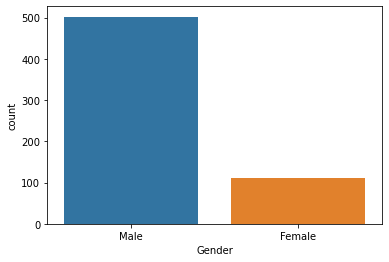

In [23]:
sns.countplot(loan_proj.Gender)

<AxesSubplot:xlabel='Married', ylabel='count'>

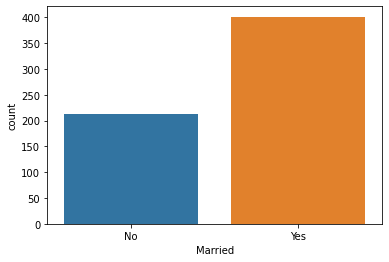

In [24]:
sns.countplot(loan_proj.Married)

<AxesSubplot:xlabel='Dependents', ylabel='count'>

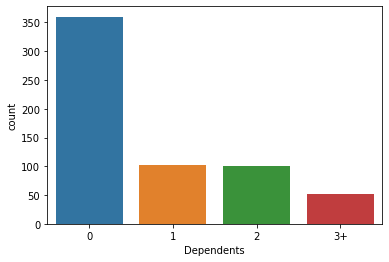

In [25]:
sns.countplot(loan_proj.Dependents)

<AxesSubplot:xlabel='Education', ylabel='count'>

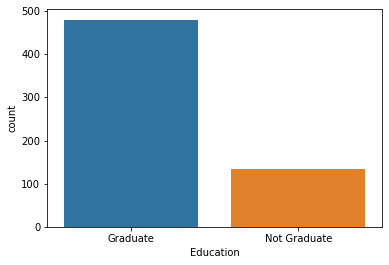

In [26]:
sns.countplot(loan_proj.Education)

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

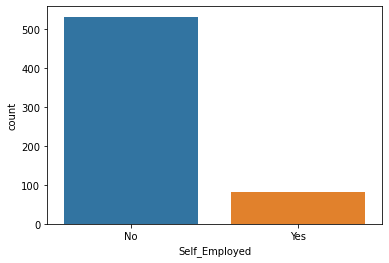

In [27]:
sns.countplot(loan_proj.Self_Employed)

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

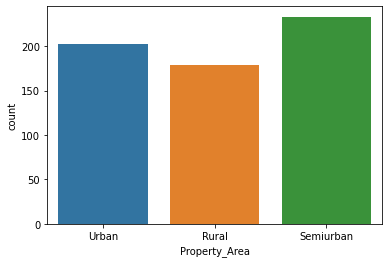

In [28]:
sns.countplot(loan_proj.Property_Area)

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

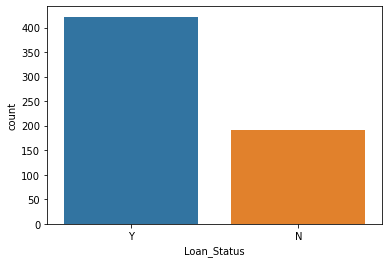

In [29]:
sns.countplot(loan_proj.Loan_Status)

In [30]:
loan_proj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [31]:
loan_proj.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.410423,0.855049
std,6109.041673,2926.248369,84.037468,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


From the above case, we will use these terms like ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term and Credit_History

# EDA

# Normal Distribution Curve ---

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

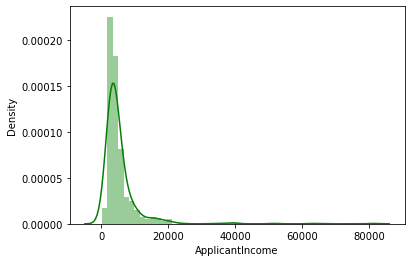

In [39]:
sns.distplot(loan_proj.ApplicantIncome, color="green")

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

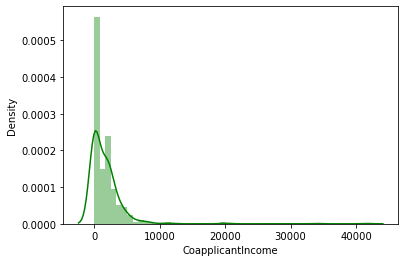

In [40]:
sns.distplot(loan_proj.CoapplicantIncome, color="green")

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

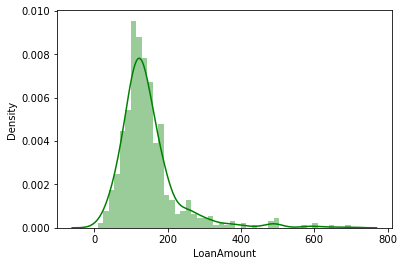

In [41]:
sns.distplot(loan_proj.LoanAmount, color="green")

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

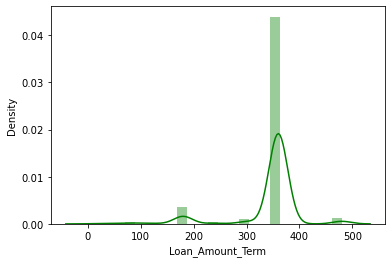

In [43]:
sns.distplot(loan_proj.Loan_Amount_Term, color="green")

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

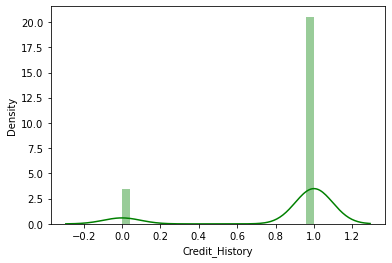

In [45]:
sns.distplot(loan_proj.Credit_History, color="green")

From the above case, it is clear that the data is highly skewed

# Scatterplot ---

In [47]:
loan_proj.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<AxesSubplot:xlabel='Gender', ylabel='Loan_Status'>

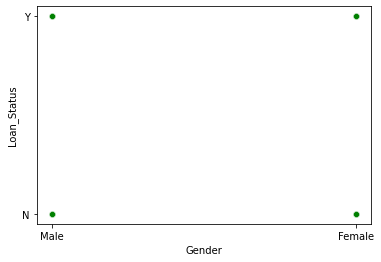

In [50]:
sns.scatterplot(x="Gender", y="Loan_Status", data = loan_proj, color="green")

<AxesSubplot:xlabel='Married', ylabel='Loan_Status'>

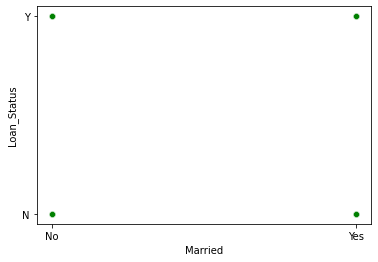

In [51]:
sns.scatterplot(x="Married", y="Loan_Status", data = loan_proj, color="green")

<AxesSubplot:xlabel='Dependents', ylabel='Loan_Status'>

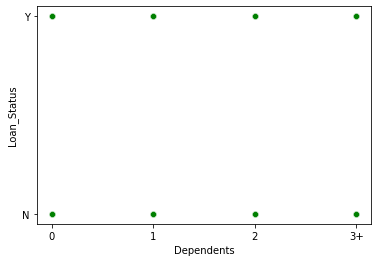

In [52]:
sns.scatterplot(x="Dependents", y="Loan_Status", data = loan_proj, color="green")

<AxesSubplot:xlabel='Education', ylabel='Loan_Status'>

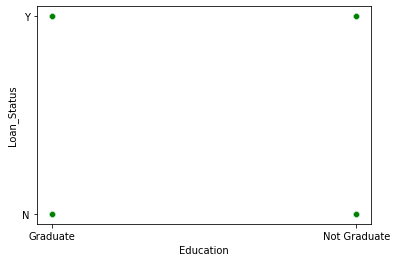

In [53]:
sns.scatterplot(x="Education", y="Loan_Status", data = loan_proj, color="green")

<AxesSubplot:xlabel='Self_Employed', ylabel='Loan_Status'>

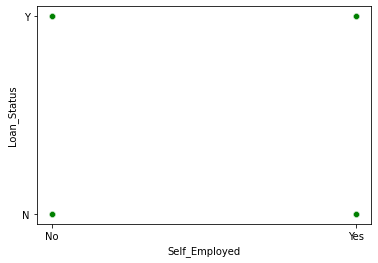

In [54]:
sns.scatterplot(x="Self_Employed", y="Loan_Status", data = loan_proj, color="green")

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Loan_Status'>

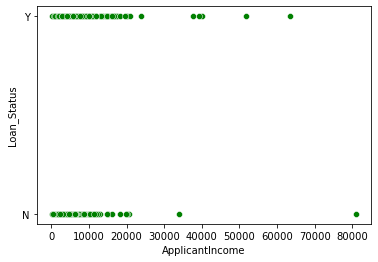

In [55]:
sns.scatterplot(x="ApplicantIncome", y="Loan_Status", data = loan_proj, color="green")

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Loan_Status'>

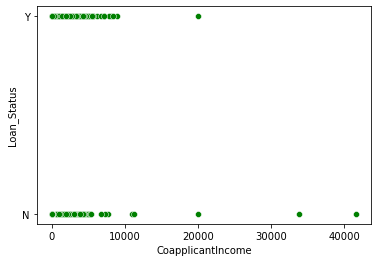

In [56]:
sns.scatterplot(x="CoapplicantIncome", y="Loan_Status", data = loan_proj, color="green")

<AxesSubplot:xlabel='LoanAmount', ylabel='Loan_Status'>

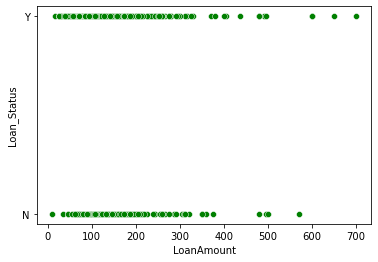

In [57]:
sns.scatterplot(x="LoanAmount", y="Loan_Status", data = loan_proj, color="green")

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Loan_Status'>

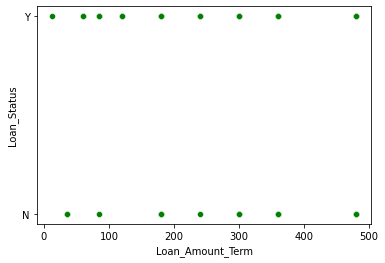

In [58]:
sns.scatterplot(x="Loan_Amount_Term", y="Loan_Status", data = loan_proj, color="green")

<AxesSubplot:xlabel='Credit_History', ylabel='Loan_Status'>

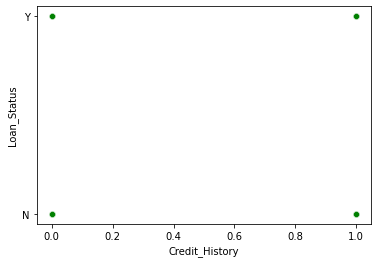

In [59]:
sns.scatterplot(x="Credit_History", y="Loan_Status", data = loan_proj, color="green")

<AxesSubplot:xlabel='Property_Area', ylabel='Loan_Status'>

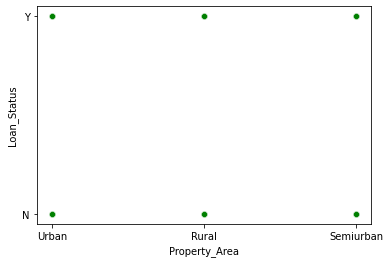

In [60]:
sns.scatterplot(x="Property_Area", y="Loan_Status", data = loan_proj, color="green")

In [61]:
from sklearn.preprocessing import LabelEncoder

lab = LabelEncoder()
for i in a_cols:
    loan_proj[i] = lab.fit_transform(loan_proj[i])

# Checking Outliers ---

In [63]:
loan_proj.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<AxesSubplot:xlabel='Gender'>

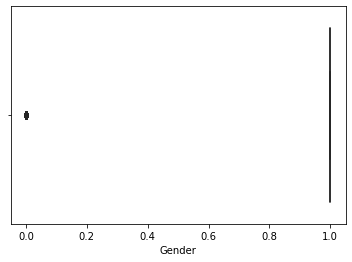

In [64]:
sns.boxplot(loan_proj.Gender, color="green")

<AxesSubplot:xlabel='Married'>

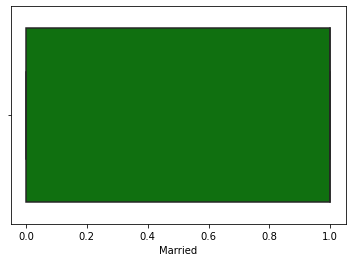

In [65]:
sns.boxplot(loan_proj.Married, color="green")

<AxesSubplot:xlabel='Dependents'>

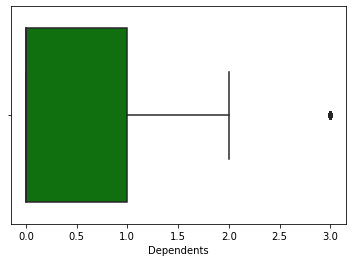

In [66]:
sns.boxplot(loan_proj.Dependents, color="green")

<AxesSubplot:xlabel='Education'>

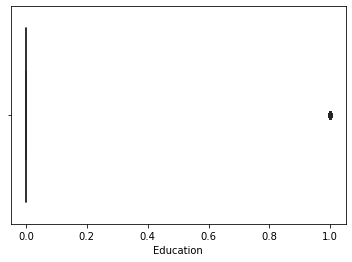

In [67]:
sns.boxplot(loan_proj.Education, color="green")

<AxesSubplot:xlabel='Self_Employed'>

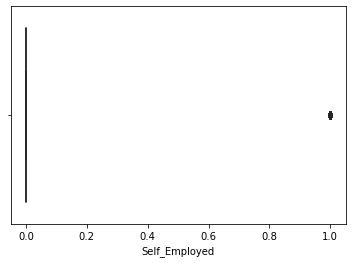

In [68]:
sns.boxplot(loan_proj.Self_Employed, color="green")

<AxesSubplot:xlabel='ApplicantIncome'>

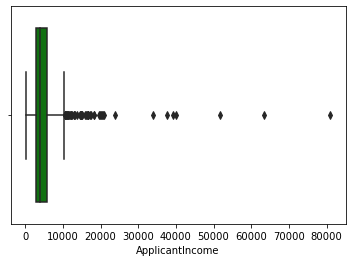

In [69]:
sns.boxplot(loan_proj.ApplicantIncome, color="green")

<AxesSubplot:xlabel='CoapplicantIncome'>

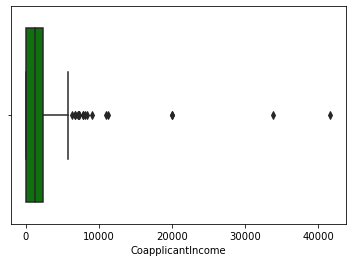

In [70]:
sns.boxplot(loan_proj.CoapplicantIncome, color="green")

<AxesSubplot:xlabel='LoanAmount'>

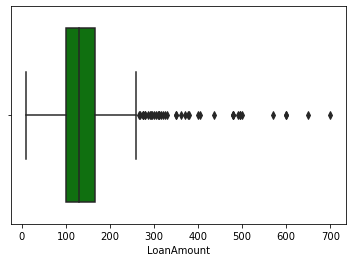

In [71]:
sns.boxplot(loan_proj.LoanAmount, color="green")

<AxesSubplot:xlabel='Loan_Amount_Term'>

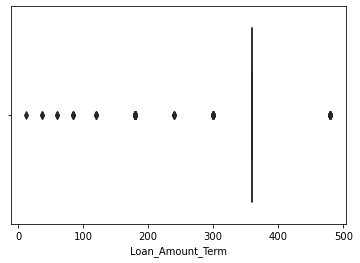

In [72]:
sns.boxplot(loan_proj.Loan_Amount_Term, color="green")

<AxesSubplot:xlabel='Credit_History'>

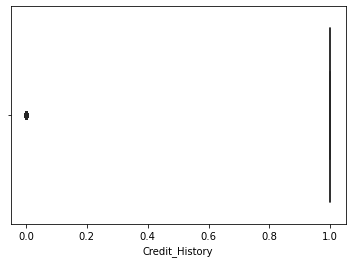

In [73]:
sns.boxplot(loan_proj.Credit_History, color="green")

<AxesSubplot:xlabel='Property_Area'>

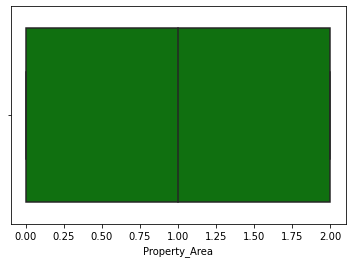

In [74]:
sns.boxplot(loan_proj.Property_Area, color="green")

<AxesSubplot:xlabel='Loan_Status'>

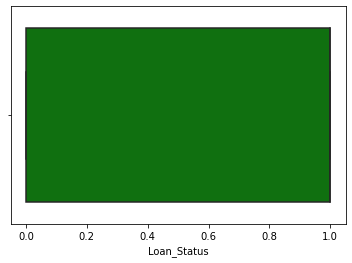

In [75]:
sns.boxplot(loan_proj.Loan_Status, color="green")

From the above case, we observed that there are few outliers

In [76]:
loan_proj.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

From the above case, there are a lot of skewness present in the dataset which will be removed later

# Correlation ---

In [77]:
loan_proj.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.074030,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100912,0.010938,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.103864,-0.040160,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033739,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.046531,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059383,0.011134,0.010522,-0.059187
LoanAmount,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.036475,-0.001431,-0.044776,-0.036416
Loan_Amount_Term,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.046531,-0.059383,0.036475,1.000000,-0.004705,-0.076120,-0.022549
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,-0.018615,0.011134,-0.001431,-0.004705,1.000000,0.001963,0.540556


Correlation using Heatmap

<AxesSubplot:>

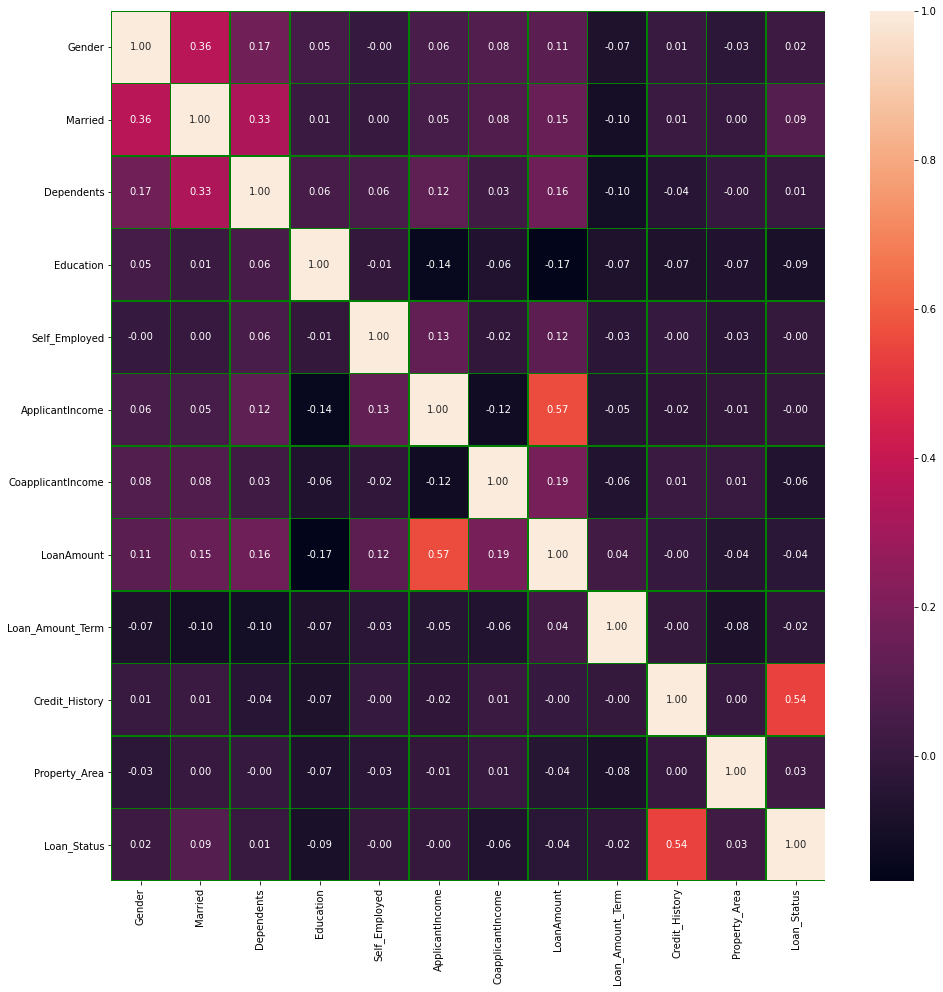

In [78]:
plt.figure(figsize=(16,16))
sns.heatmap(loan_proj.corr(), annot=True, linewidth=0.5, linecolor='green', fmt='.2f')

# Checking Multicolinearity ---

In [81]:
x = loan_proj.iloc[:,:-1]
y = loan_proj.iloc[:,-1]

import scipy.stats as st
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as viff

def calc_vif(x1):
    vif = pd.DataFrame()
    vif["Variables"] = x1.columns
    vif['VIF Factor'] = [viff(x1.values,i) for i in range(x1.shape[1])]
    return(vif)

In [82]:
calc_vif(x)

,Variables,VIF Factor
0,Gender,6.003428
1,Married,3.654835
2,Dependents,1.791861
3,Education,1.306142
4,Self_Employed,1.176661
5,ApplicantIncome,2.889241
6,CoapplicantIncome,1.480396
7,LoanAmount,6.849968
8,Loan_Amount_Term,10.322123
9,Credit_History,6.058628


From the above case, Loan_Amount_Term is very collinear that's why we will remove it

In [83]:
loan_proj.drop(["Loan_Amount_Term"], axis=1, inplace=True)

In [85]:
from scipy.stats import zscore

z = zscore(loan_proj)

In [86]:
for i in [3,3.2,3.4,3.6,3.8,4.0,4.2,4.4,4.6,4.8]:
    LP_1 = loan_proj.copy()
    LP_new = loan_proj[(z<i).all(axis=1)]
    loss = ((LP_1.shape[0]-LP_new.shape[0])*100)/LP_1.shape[0]
    print ("At i",i," loss % is",loss)

At i 3  loss % is 4.071661237785016
At i 3.2  loss % is 3.420195439739414
At i 3.4  loss % is 3.420195439739414
At i 3.6  loss % is 3.257328990228013
At i 3.8  loss % is 3.257328990228013
At i 4.0  loss % is 2.768729641693811
At i 4.2  loss % is 2.44299674267101
At i 4.4  loss % is 2.2801302931596092
At i 4.6  loss % is 2.2801302931596092
At i 4.8  loss % is 2.1172638436482085


From the above case, we will take the threshold value equal to 3.

In [87]:
loan_proj = loan_proj[(z<3).all(axis=1)]

In [88]:
x = loan_proj.iloc[:,:-1]
y = loan_proj.iloc[:,-1]

In [89]:
x.shape

(589, 10)

Number of Rows = 589 and Columns = 10

In [90]:
y.shape

(589,)

Number of Rows = 589

In [91]:
from imblearn.over_sampling import SMOTE

smt = SMOTE()
x,y = smt.fit_resample(x,y)

In [92]:
x.shape

(814, 10)

Now from the above case, the number of Rows = 814 and Columns = 10

In [93]:
y.shape

(814,)

The number of Rows = 814

In [94]:
from sklearn.preprocessing import PowerTransformer

PT = PowerTransformer()
for i in loan_proj.columns:
    if np.abs(loan_proj[i].skew())>0.5:
        loan_proj[i] = PT.fit_transform(loan_proj[i].values.reshape(-1,1))
    elif np.abs(loan_proj[i].skew())<-0.5:
        loan_proj[i] = PT.fit_transform(loan_proj[i].values.reshape(-1,1))

In [147]:
from sklearn.preprocessing import MinMaxScaler

MMS = MinMaxScaler()
x = MMS.fit_transform(x)

# Logistic Regression ---

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

lg = LogisticRegression()
x_train = x
y_train = y
x_test = x
y_test = y
acc = 0
r_state = 0
for i in (0,1000):
    tr_x,t_x,tr_y,t_y=train_test_split(x,y,random_state=i,test_size=0.20)
    lg.fit(tr_x,tr_y)
    pred = lg.predict(t_x)
    if accuracy_score(t_y,pred)>acc:
        acc = accuracy_score(t_y,pred)
        x_train = tr_x
        x_test = t_x
        y_train = tr_y
        y_test = t_y
        r_state = i
print("At Random State",r_state,"Accuracy Score is Maximum i.e.",acc)

At Random State 1000 Accuracy Score is Maximum i.e. 0.8098159509202454


In [97]:
def fun(f):
    f.fit(x_train,y_train)
    pred = f.predict(x_test)
    print("Accuracy Score",accuracy_score(y_test,pred))
    print("Confusion Matrix\n",confusion_matrix(y_test,pred))
    print("Classification Report\n",classification_report(y_test,pred))

In [98]:
fun(lg)

Accuracy Score 0.8098159509202454
Confusion Matrix
 [[62 22]
 [ 9 70]]
Classification Report
               precision    recall  f1-score   support

           0       0.87      0.74      0.80        84
           1       0.76      0.89      0.82        79

    accuracy                           0.81       163
   macro avg       0.82      0.81      0.81       163
weighted avg       0.82      0.81      0.81       163



# Cross Validation Score ---

In [99]:
from sklearn.model_selection import cross_val_score,KFold

def cvs(m):
    cv1 = KFold(n_splits=5,shuffle=True)
    score = cross_val_score(m,x,y,cv=cv1,scoring='accuracy')
    print("Cross Val Score",score)
    print(score.mean())

In [100]:
from sklearn.model_selection import GridSearchCV

def hypertuning(params,model):
    gd = GridSearchCV(model,params,cv=5,scoring='accuracy')
    gd.fit(x,y)
    print(gd.best_params_)

In [101]:
cvs(lg)

Cross Val Score [0.82208589 0.69325153 0.7791411  0.83435583 0.7345679 ]
0.7726804514125578


In [102]:
Acc = [80.98]
CVS = [77.26]
Model = ["Logistic Regression"]

In [103]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

svc = SVC()
dtc = DecisionTreeClassifier()
knc = KNeighborsClassifier()
gnb = GaussianNB()

In [104]:
from sklearn.svm import SVC
params_svc={
    'kernel':['poly','linear','rbf','sigmoid'],'degree':[1,3],'gamma':['auto','scale'],'shrinking':[True,False]}
hypertuning(params_svc,SVC())

{'degree': 3, 'gamma': 'scale', 'kernel': 'poly', 'shrinking': True}


In [105]:
svc = SVC(degree=1,gamma='scale',kernel='rbf',shrinking=True)

fun(svc)

Accuracy Score 0.7975460122699386
Confusion Matrix
 [[58 26]
 [ 7 72]]
Classification Report
               precision    recall  f1-score   support

           0       0.89      0.69      0.78        84
           1       0.73      0.91      0.81        79

    accuracy                           0.80       163
   macro avg       0.81      0.80      0.80       163
weighted avg       0.82      0.80      0.80       163



In [106]:
cvs(svc)

Cross Val Score [0.79141104 0.77300613 0.77300613 0.7607362  0.74691358]
0.7690146178898735


In [107]:
Acc.append(79.75)
CVS.append(76.90)
Model.append("SVC")

In [108]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
params_dtc = {'criterion':['gini','entropy'],'splitter':['random','best'],'max_depth':[None,1,2,3],'min_samples_split':[2,3,4]}
hypertuning(params_dtc,dtc)

{'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2, 'splitter': 'best'}


In [109]:
dtc = DecisionTreeClassifier(criterion='gini',max_depth=1,min_samples_split=2,splitter='best')

fun(dtc)

Accuracy Score 0.7791411042944786
Confusion Matrix
 [[50 34]
 [ 2 77]]
Classification Report
               precision    recall  f1-score   support

           0       0.96      0.60      0.74        84
           1       0.69      0.97      0.81        79

    accuracy                           0.78       163
   macro avg       0.83      0.78      0.77       163
weighted avg       0.83      0.78      0.77       163



In [110]:
cvs(dtc)

Cross Val Score [0.78527607 0.80368098 0.73006135 0.7607362  0.7654321 ]
0.7690373399984851


In [111]:
Acc.append(77.91)
CVS.append(76.90)
Model.append("Decision Tree Classifier")

In [112]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier()
params_knc = {'n_neighbors':[5,7,9,11],'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree','brute'],'leaf_size':[30,40,50]}
hypertuning(params_knc,knc)

{'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 9, 'weights': 'distance'}


In [113]:
knc = KNeighborsClassifier(algorithm='auto',leaf_size=30,n_neighbors=9,weights='distance')

fun(knc)

Accuracy Score 0.7607361963190185
Confusion Matrix
 [[60 24]
 [15 64]]
Classification Report
               precision    recall  f1-score   support

           0       0.80      0.71      0.75        84
           1       0.73      0.81      0.77        79

    accuracy                           0.76       163
   macro avg       0.76      0.76      0.76       163
weighted avg       0.76      0.76      0.76       163



In [114]:
cvs(knc)

Cross Val Score [0.7607362  0.74233129 0.79754601 0.74846626 0.78395062]
0.7666060743770355


In [115]:
Acc.append(76.07)
CVS.append(76.66)
Model.append("K Neighbors Classifier")

In [116]:
fun(gnb)

Accuracy Score 0.7914110429447853
Confusion Matrix
 [[55 29]
 [ 5 74]]
Classification Report
               precision    recall  f1-score   support

           0       0.92      0.65      0.76        84
           1       0.72      0.94      0.81        79

    accuracy                           0.79       163
   macro avg       0.82      0.80      0.79       163
weighted avg       0.82      0.79      0.79       163



In [117]:
cvs(gnb)

Cross Val Score [0.74233129 0.79754601 0.74846626 0.80981595 0.72839506]
0.7653109141861699


In [118]:
Acc.append(79.14)
CVS.append(76.53)
Model.append("Gaussian NB Classifier")

# Ensemble Method ---

In [119]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
params_rf = {'n_estimators':[10,20,100,50],
           'criterion':['gini', 'entropy'],
           'max_depth':[None,1,2,3],
           'min_samples_split':[2,3,4]}
hypertuning(params_rf,rf)

{'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}


In [120]:
rf = RandomForestClassifier(criterion='entropy',max_depth=None,min_samples_split=3,n_estimators=100)

fun(rf)

Accuracy Score 0.8220858895705522
Confusion Matrix
 [[67 17]
 [12 67]]
Classification Report
               precision    recall  f1-score   support

           0       0.85      0.80      0.82        84
           1       0.80      0.85      0.82        79

    accuracy                           0.82       163
   macro avg       0.82      0.82      0.82       163
weighted avg       0.82      0.82      0.82       163



In [121]:
cvs(rf)

Cross Val Score [0.7607362  0.85276074 0.78527607 0.85276074 0.82098765]
0.8145042793304551


In [123]:
Acc.append(82.20)
CVS.append(81.45)
Model.append("Random Forest Classifier")

In [124]:
from sklearn.tree import ExtraTreeClassifier

ext = ExtraTreeClassifier()
params_ext = {'criterion':['gini','entropy'],
            'splitter':['random','best'],
            'max_depth':[None,1,2,3],
            'min_samples_split':[2,3,4]}
hypertuning(params_ext,ext)

{'criterion': 'gini', 'max_depth': None, 'min_samples_split': 4, 'splitter': 'best'}


In [125]:
ext=ExtraTreeClassifier(criterion='entropy',max_depth=None,min_samples_split=2,splitter='best')

fun(ext)

Accuracy Score 0.7423312883435583
Confusion Matrix
 [[68 16]
 [26 53]]
Classification Report
               precision    recall  f1-score   support

           0       0.72      0.81      0.76        84
           1       0.77      0.67      0.72        79

    accuracy                           0.74       163
   macro avg       0.75      0.74      0.74       163
weighted avg       0.75      0.74      0.74       163



In [126]:
cvs(ext)

Cross Val Score [0.71779141 0.6993865  0.79141104 0.69325153 0.74074074]
0.7285162463076572


In [127]:
Acc.append(74.23)
CVS.append(72.85)
Model.append("Extra Tree Classifier")

In [128]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
params_ada = {'n_estimators':[10,20,30,50],'learning_rate':[1,0.9,0.8],'algorithm':['SAMME', 'SAMME.R'],'random_state':[43,33,56]}
hypertuning(params_ada,ada)

{'algorithm': 'SAMME.R', 'learning_rate': 0.8, 'n_estimators': 10, 'random_state': 43}


In [129]:
ada = AdaBoostClassifier(algorithm='SAMME',learning_rate=0.9,n_estimators=20,random_state=43)

fun(ada)

Accuracy Score 0.8159509202453987
Confusion Matrix
 [[61 23]
 [ 7 72]]
Classification Report
               precision    recall  f1-score   support

           0       0.90      0.73      0.80        84
           1       0.76      0.91      0.83        79

    accuracy                           0.82       163
   macro avg       0.83      0.82      0.82       163
weighted avg       0.83      0.82      0.81       163



In [130]:
cvs(ada)

Cross Val Score [0.71779141 0.80368098 0.80368098 0.79754601 0.79012346]
0.7825645686586382


In [131]:
Acc.append(81.59)
CVS.append(78.25)
Model.append("Ada Boost Classifier")

In [135]:
output =pd.DataFrame()
output["Models"] = Model
output["CVS"] = CVS
output["Accuracy"]= Acc
diff = []

for i in range(0,len(Acc)):
    diff.append(Acc[i]-CVS[i])
output["Diff."] = diff
output.index+=1

In [136]:
output

,Models,CVS,Accuracy,Diff.
1,Logistic Regression,77.26,80.98,3.72
2,SVC,76.90,79.75,2.85
3,Decision Tree Classifier,76.90,77.91,1.01
4,K Neighbors Classifier,76.66,76.07,-0.59
5,Gaussian NB Classifier,76.53,79.14,2.61
6,Random Forest Classifier,81.45,82.20,0.75
7,Extra Tree Classifier,72.85,74.23,1.38
8,Ada Boost Classifier,78.25,81.59,3.34


From the above case, best model is Random Forest Classifier because both the accuracy and cvs is high

# Model Saving ---

In [137]:
import pickle

filename = "Loan_proj.pkl"
pickle.dump(rf,open(filename,'wb'))

In [138]:
predict = rf.predict(x_test)

In [139]:
output_rf = pd.DataFrame()
output_rf["Actual"] = y_test
output_rf["Predicted"] = predict

In [140]:
output_rf

,Actual,Predicted
258,1,1
26,1,1
443,1,1
33,0,0
492,1,0
...,...,...
545,0,0
628,0,0
157,0,1
624,0,0


In [148]:
#  Let's save the dataframe in csv file

In [141]:
output_rf.to_csv('Loan_proj.csv')

In [149]:
# The Accuracy score in the case of Random Forest Classifier is the highest i.e. 82.20% 

# AUC ROC CURVE ---

In [142]:
from sklearn.metrics import roc_curve,roc_auc_score

In [143]:
y_pred_prob = rf.predict_proba(x_test)[:,1]

In [144]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)

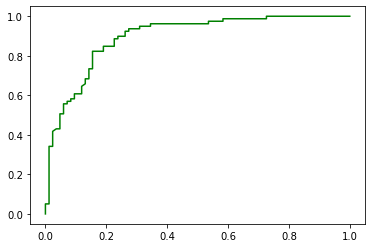

In [146]:
plt.plot(fpr,tpr, color="green")
plt.show()